<a href="https://colab.research.google.com/github/pragneshrana/Algo_Trial/blob/master/Fuel_Reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Calling libraries  and dataset 

In [1]:
#loaded data
import pandas as pd
url = 'https://raw.githubusercontent.com/sivaramambikasaran/Data_driven_Kinetics/master/data/Alkane_Dataset_full_stanford_AR.csv?token=AINCVGUITKDVFRUDJQI7RZS6HP64A'
df = pd.read_csv(url)# Dataset is now stored in a Pandas Dataframe
print(df.columns)
# df = df.loc[:10,:]
print(df)

Index(['Fuel', 'T(K)', 'T_Error(%)', 'P(atm)', 'P_Error(%)', 'Fuel(%)',
       'Oxidizer(%)', 'Diluant(%)', 'Equv(phi)', 'Diluant Type', 'Time(μs)',
       'Mode_of_measurement', 'Species_name', 'Species_measurement_Error',
       'Measured_wavelength(nm)', 'Shocktube_dia(cm)', 'Research_group',
       'Data_Source'],
      dtype='object')
         Fuel  ...                                        Data_Source
0    CCCCCCCC  ...  Lam_2013_thesis / Normal_Alkanes_and_Simple_Ox...
1    CCCCCCCC  ...  Lam_2013_thesis / Normal_Alkanes_and_Simple_Ox...
2    CCCCCCCC  ...  Lam_2013_thesis / Normal_Alkanes_and_Simple_Ox...
3    CCCCCCCC  ...  Lam_2013_thesis / Normal_Alkanes_and_Simple_Ox...
4    CCCCCCCC  ...  Lam_2013_thesis / Normal_Alkanes_and_Simple_Ox...
..        ...  ...                                                ...
444   CCCCCCC  ...                                n_heptane_oxidation
445   CCCCCCC  ...                                n_heptane_oxidation
446   CCCCCCC  ...          

In [2]:
print(df['Fuel'] )

0      CCCCCCCC
1      CCCCCCCC
2      CCCCCCCC
3      CCCCCCCC
4      CCCCCCCC
         ...   
444     CCCCCCC
445     CCCCCCC
446     CCCCCCC
447     CCCCCCC
448     CCCCCCC
Name: Fuel, Length: 449, dtype: object


#Fucntion for finding the S_H bonds

In [0]:
def find_chain_length(fuel_data):
  '''
  This method will return the number of double bonds in the alkanes
  Input: list of fuel
  output : fuel S_H bond array 
  '''
  S_H = np.zeros(len(fuel_data))
  #number bonds in the alkanes are (2n-2) for C>3 (S_H)
  for i in range(len(fuel_data)):
    S_H_count = 2*(len(fuel_data[i])-2) #count by fuel length
    S_H[i] = S_H_count
  return S_H

# #check fucntion
# print(find_chain_length(['CCC','CCCC']))


#Required columns from data

In [127]:
#calling library
import pandas as pd
import numpy as np

data = pd.DataFrame([]) #Empty DataFrame

#required data
data['S_H'] = find_chain_length(list(df['Fuel']))
data['T(K)'] = df['T(K)']
data['P(atm)'] = df['P(atm)']
data['Fuel(%)'] = df['Fuel(%)']
data['Oxidizer(%)'] = df['Oxidizer(%)']
data['Diluant(%)'] = df['Diluant(%)']
data['Equv(phi)'] = df['Equv(phi)']
data['Time(μs)'] = df['Time(μs)']
print(data)

      S_H  T(K)  P(atm)  Fuel(%)  Oxidizer(%)  Diluant(%)  Equv(phi)  Time(μs)
0    12.0  1325   1.950     0.32         4.00       95.68        1.0       859
1    12.0  1265   2.050     0.32         4.00       95.68        1.0      1569
2    12.0  1289   2.010     0.32         4.00       95.68        1.0      1198
3    12.0  1385   1.960     0.32         4.00       95.68        1.0       390
4    12.0  1455   1.870     0.32         4.00       95.68        1.0       166
..    ...   ...     ...      ...          ...         ...        ...       ...
444  10.0  1378   2.326     0.03         0.33       99.64        1.0      1330
445  10.0  1494   2.155     0.03         0.33       99.64        1.0      1330
446  10.0  1494   2.155     0.03         0.33       99.64        1.0       308
447  10.0  1502   2.262     0.03         0.33       99.64        1.0       280
448  10.0  1506   2.360     0.03         0.33       99.64        1.0       189

[449 rows x 8 columns]


# Conversion of data into the log or other form to frame the corelation 

In [128]:
converted_data  = pd.DataFrame([]) #Empty DataFrame
T_0 = 1000
# conversion of parameters for the equation 
converted_data['const'] = np.ones(df.shape[0])
converted_data['T0/T'] = T_0 / df['T(K)'] 
# converted_data['1/S_H'] = 1/find_chain_length(list(df['Fuel']))
converted_data['T0/T*S_H'] = converted_data['T0/T']/find_chain_length(list(df['Fuel']))
# converted_data['log_T'] = np.log(df['T(K)'])
# converted_data['log_T'] = np.log(df['T(K)'])
converted_data['log_P'] = np.log(df['P(atm)'])
converted_data['log_Fuel'] = np.log(df['Fuel(%)'])
converted_data['log_oxi'] = np.log(df['Oxidizer(%)'])
# converted_data['log_Dilu'] = np.log(df['Diluant(%)'])
# converted_data['log_Equi'] = np.log(df['Equv(phi)'])
converted_data['log_Time'] = np.log(df['Time(μs)'])
converted_data.columns

Index(['const', 'T0/T', 'T0/T*S_H', 'log_P', 'log_Fuel', 'log_oxi',
       'log_Time'],
      dtype='object')

#Defining matrix X and actual result y - ($\log \tau$)

In [129]:
#defi
X = converted_data.iloc[:,:-1]
y =  converted_data.iloc[:,-1]
print(y)

0      6.755769
1      7.358194
2      7.088409
3      5.966147
4      5.111988
         ...   
444    7.192934
445    7.192934
446    5.730100
447    5.634790
448    5.241747
Name: log_Time, Length: 449, dtype: float64


#Scaling

In [0]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler().fit(X)
# X = scaler.transform(X)
# print(X)

In [131]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train)

     const      T0/T  T0/T*S_H     log_P  log_Fuel   log_oxi
227    1.0  0.953289  0.047664  1.750937 -0.556172  3.044522
419    1.0  0.698812  0.069881  1.742219 -0.916291  1.481605
118    1.0  0.966184  0.483092  3.990834 -0.223144  2.079442
114    1.0  0.909091  0.454545  4.157319 -0.223144  2.079442
168    1.0  0.638162  0.319081  1.465568  0.470004  1.974081
..     ...       ...       ...       ...       ...       ...
106    1.0  1.004016  0.502008  4.001864 -0.223144  2.079442
270    1.0  0.828500  0.059179  2.720637 -0.916291  1.386294
348    1.0  0.680272  0.042517  0.207014 -1.609438  1.131402
435    1.0  0.684463  0.068446  0.512824 -2.995732 -0.597837
102    1.0  0.914913  0.457457  4.014580 -0.223144  2.079442

[314 rows x 6 columns]


#Regression
To solve $X\beta= y$

$X^TX \beta= X^Ty$

Now decomposing matrix using QR decomposition \
taking, $X = QR$

$(QR)^T(QR) \beta= (QR)^Ty$

$( R^T Q^T Q R) \beta= (QR)^Ty$

$( R^T R) \beta= R^T Q^Ty$

$ (R^T)^{-1} R^T R \beta=  Q^Ty$

$ R \beta=  Q^Ty$

$ R \beta=  z$

As R is upper triangular which can be solved by back substituion.

Check : https://adrianstoll.com/linear-algebra/least-squares.html


In [132]:
#Find parameters by regression using least-square formula (XT X)^-1 XT 
import scipy as sp

def back_substitution(A,b):
  '''
  This method will de backsubstitution
  '''
  n = A.shape[1] #no_of_par
  print(n)
  x = np.zeros(A.shape[1]) #weights = no of parameter = colm
  #last elements
  for i in range(n-1, -1, -1):
      for j in range (i, n, 1):
          b[i] -= A[i, j]*x[j]
      x[i] = b[i] / A[i,i]
  return x

def regression(X,y):
  '''
  This method will best fit using QR factorization
  '''
  if(X.shape[1] < X.shape[0]):
    '''
    solving overdetermined system
    '''
    Q,R = sp.linalg.qr(X)
    #solve 
    z = np.matmul(np.transpose(Q),y)
    #back-substitution
    beta = back_substitution(R,z)
    return beta
  else:
    exit()


# #test-1
# M = np.matrix([[1,-1,2],[0,-1,-2],[0,0,-6],[9,1,2],[7,4,1]])
# c = np.array([2,5,3,8,3])
# #ans : [ 1.27408155 -1.53528339 -0.61609186]

# #test-2
# #test-1
# M = np.matrix([[1,-1,2],[0,-1,-2],[0,0,-6],[9,1,2],[7,4,1]])
# c = np.array([2,5,3,3,3])
# #ans : [ 1.27408155 -1.53528339 -0.61609186]

# coef = regression(M,c)
# print(coef)
coef = regression(X_train,y_train)

#Coefficent table 
coef_result = pd.DataFrame([])
coef_result['para_coef'] = X.columns
coef_result['coef'] = coef
print(coef_result)


6
  para_coef       coef
0     const  -2.830145
1      T0/T  12.291421
2  T0/T*S_H   3.659769
3     log_P  -0.549135
4  log_Fuel  -0.151672
5   log_oxi  -0.270715


#If
The functional form is,

$\log \tau = \beta_0 + \beta_1  \log{P} + \beta_2 \log{Fuel} + \beta_3 \log{Oxi} + \beta_4 \frac{T_0}{T} + \beta_5 \frac{T_0}{T*S_H}$


$\tau = exp(\beta_0')  {P}^{\beta_1}  {Fuel}^{\beta_2}   {Oxi}^{\beta_3} \exp\bigg(\beta_4 \frac{T_0}{T} + \beta_5 \frac{T_0}{T*S_H}\bigg)$

$\tau = \beta_0'  {P}^{\beta_1}  {Fuel}^{\beta_2}   {Oxi}^{\beta_3} \exp\bigg(\beta_4 \frac{T_0}{T} + \beta_5 \frac{T_0}{T*S_H}\bigg)$


#Prediction:


In [133]:
y_hat_train = X_train.dot(coef)
print(y_hat_train)

227    7.360228
419    4.796167
118    8.093032
114    7.195387
168    4.771043
         ...   
106    8.621220
270    5.839572
348    5.511109
435    6.167975
102    7.355987
Length: 314, dtype: float64


#Comparision $Y_{predicted}$  vs $Y_{actual}$


        y_act    y_pred
227  7.360228  7.855932
419  4.796167  4.787492
118  8.093032  7.867106
114  7.195387  6.813445
168  4.771043  4.454347
..        ...       ...
106  8.621220  7.904704
270  5.839572  5.723585
348  5.511109  5.192957
435  6.167975  5.902633
102  7.355987  6.907755

[314 rows x 2 columns]


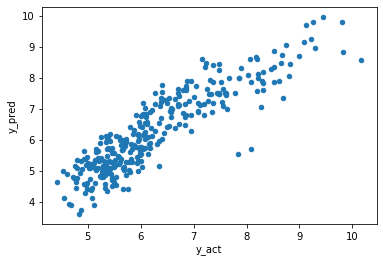

In [134]:
compare = pd.DataFrame([])
compare['y_act'] = y_hat_train
compare['y_pred'] = y_train
ax = compare.plot.scatter(x='y_act', y='y_pred', rot=0)
print(compare)

#Maximum Relative Error in Training



In [135]:
max_relative_error = np.max(np.abs(y_train - y_hat)/y_train)
print(max_relative_error)

0.412440573720333


#Testing set


        y_act    y_pred
285  7.376065  7.201171
296  6.503962  7.498316
117  7.864427  7.605890
347  5.041748  3.688879
70   7.458495  7.265430
..        ...       ...
131  6.148735  6.950815
26   6.548200  6.040255
7    5.360869  5.652489
408  5.103302  5.241747
108  8.853703  8.089482

[135 rows x 2 columns]
9.963170554697301


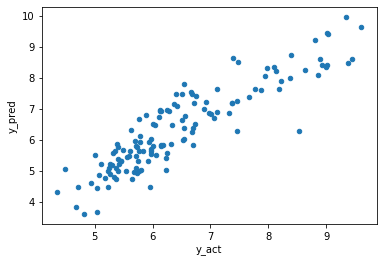

In [136]:
y_hat_test = X_test.dot(coef)

#testing compare
compare = pd.DataFrame([])
compare['y_act'] = y_hat_test
compare['y_pred'] = y_test
ax = compare.plot.scatter(x='y_act', y='y_pred', rot=0)
print(compare)

#maximum value in y_predicted
max_val = np.max(compare['y_pred'])
print(max_val)

#Maximum Relative Error Testing

In [137]:
#Maximum Relative Error in Training
max_absolute = np.max(np.abs(y_test - y_hat_test))
print(max_absolute)
max_relative_error_test = np.max(np.abs(y_test - y_hat_test)/y_test)
print(max_relative_error)


2.2305895560013926
0.412440573720333


#Error row wise


In [0]:
error = np.abs(y_hat - y_train )

#Error Based clustering